In [188]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    s = 1 / (1 + np.exp(-X))
    return s * (1 - s)

def da_dz(Z): #sigmoid_backward
    return np.exp(-Z) * np.power(1 + np.exp(-Z), -2)

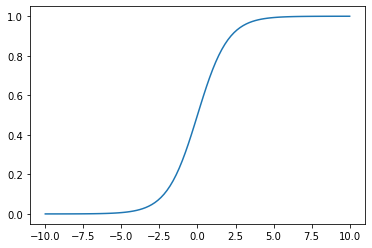

In [189]:
X = np.linspace(-10, 10, 101)
plt.plot(X, sigmoid(X))
plt.show()

In [190]:
input_shape = 1
layer_dims = [input_shape, 4,4, 1]

In [193]:
def init(layer_dims):
    np.random.seed(42)
    #X = np.asarray(np.arange(-1, 4, 0.1)) # gives (50,), so (number of examples, input size)
    #X = np.random.randn(100)
    X = np.asarray([i for i in range(-50,51)])
    L = len(layer_dims) # number of layers in the network
    W = [(np.random.rand(layer_dims[l], layer_dims[l-1]))-0.5 for l in range(0,L)]
    #W=[(np.random.rand(m, n)-0.5) for n, m in zip(layer_dims[:-1], layer_dims[1:])]
    b = [np.zeros((layer_dims[l], 1)) for l in range(0,L)]
    #b = [(np.random.rand(m)-0.5) for m in layer_dims[1:]]
    #for l in range(0,len(W)):
        #assert(W[l].shape == (layer_dims[l+1], layer_dims[l]))
        #assert(b[l].shape == (layer_dims[l+1], 1))
    return X, W, b, L

def origin_functon(x):
    """
    y = a*x^3+b*x^2+c*x+d
    :param X:
    :return:
    """
    a = 1
    b = -4
    c = 1
    d = 1
    y = a * np.power(x, 3) + b * np.power(x, 2) + c * x + d
    return y

In [194]:
X, W, b, L = init(layer_dims)
X_init = X
Y = np.array(([i**2.0 for i in X]))

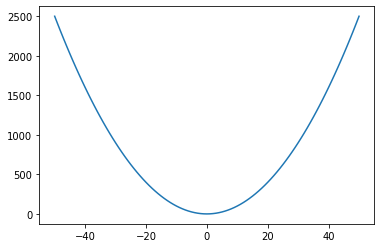

In [195]:
plt.plot(X_init, Y)

In [196]:
act = []
act.append(np.array([X]))

In [197]:
def linear_activation_forward(A, W, b):
    Z = np.dot(W, A) + b
    cache = (A, W, b, Z)
    A = sigmoid(Z)
    return A, cache

def feedforward(A, W, b, L):
    caches = []
    for l in range(0, L-1):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, W[l], b[l])
        caches.append(cache)
    A, cache = linear_activation_forward(A, W[L-1], b[L-1])
    caches.append(cache)
    return A, caches
X = X.reshape(1,X.shape[0]) # reshape to (input size, number of examples), np.array([X])
pred, caches = feedforward(X, W, b, L)
print(len(caches))

4


In [198]:
def get_cost (Y, A):
    cost = np.mean((A - Y)**2)
    return cost

In [199]:
costs = get_cost(Y, pred)

In [200]:
costs

1299627.1239311532

In [201]:
#cost derivitative dc_da
def dc_da(A, Y):
    return (A-Y)

def backward_pass(A, Y, caches, L):
    grads = {}
    dA = - (np.divide(Y, A) - np.divide(1 - Y, 1 - A))
    m = A.shape[1]
    A_prev, W, b, Z = caches[L-1]
    dZ = dA*sigmoid_der(Z)
    grads["dW" + str(L-1)] = (1 / m)*np.dot(dZ,A_prev.transpose())
    grads["db" + str(L-1)] = (1 / m)*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        A_prev, W, b, Z = current_cache
        m = A_prev.shape[1]
        dZ = dA_prev*sigmoid_der(Z)
        dW = (1 / m)*np.dot(dZ,A_prev.transpose())
        db = (1 / m)*np.sum(dZ, axis=1, keepdims=True)
        if l > 1:
            dA_prev = np.dot(W, dZ)
        grads["dW" + str(l)] = dW
        grads["db" + str(l)] = db
    return grads
grads = backward_pass(pred, Y, caches, L)

In [202]:
def update_parameters(W, b, grads, learning_rate):
    for l in range(1,L-1):
        W[l] = W[l]-learning_rate*grads["dW" + str(l)]
        b[l] = b[l]-learning_rate*grads["db" + str(l)]
        
    return W, b

W, b = update_parameters(W, b, grads, 0.0001)

In [203]:
def L_layer_model(learning_rate, num_iterations, print_cost=False):
    X, W, b, L = init(layer_dims)
    X_init = X
    Y = np.array(origin_functon(X))
    X = X.reshape(1,X.shape[0])
    for i in range(0, num_iterations):
        pred, caches = feedforward(X, W, b, L)
        costs = get_cost(Y, pred)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, costs))
        grads = backward_pass(pred, Y, caches, L)
        W, b = update_parameters(W, b, grads, learning_rate)
    
    return pred
learning_rate = 0.001
num_iterations = 300000
pred = L_layer_model(learning_rate, num_iterations, print_cost=True)
plt.plot(X_init, Y)
plt.plot(X_init, np.squeeze(pred))

Cost after iteration 0: 2391241914.911227
Cost after iteration 1000: 2391241909.258158
Cost after iteration 2000: 2391241903.591017
Cost after iteration 3000: 2391241897.911064
Cost after iteration 4000: 2391241892.219572
Cost after iteration 5000: 2391241886.517825
Cost after iteration 6000: 2391241880.807121
Cost after iteration 7000: 2391241875.088768
Cost after iteration 8000: 2391241869.364082
Cost after iteration 9000: 2391241863.634387
Cost after iteration 10000: 2391241857.901014
Cost after iteration 11000: 2391241852.165297
Cost after iteration 12000: 2391241846.428574
Cost after iteration 13000: 2391241840.692185
Cost after iteration 14000: 2391241834.957470
Cost after iteration 15000: 2391241829.225770
Cost after iteration 16000: 2391241823.498418
Cost after iteration 17000: 2391241817.776750
Cost after iteration 18000: 2391241812.062090
Cost after iteration 19000: 2391241806.355761
Cost after iteration 20000: 2391241800.659074
Cost after iteration 21000: 2391241794.973330
C

KeyboardInterrupt: 

In [66]:
np.mean(X)
print('-------')
np.median(X)

-------


1.4499999999999995